In [376]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [377]:
%matplotlib inline

In [485]:
%%time
url = "https://raw.githubusercontent.com/anoushavan/Capstone_1/master/data/new_buildings.csv"

data = pd.read_csv(url,parse_dates=['Fully Paid','Approved','SIGNOFF_DATE'])

# df = pd.DataFrame()

# for chunk in file_reader:
#     df = df.append(chunk)

# df.head()

KeyboardInterrupt: 

In [480]:
df.head()

,Borough,Building Type,eFiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,Proposed No. of Stories,...,Proposed Dwelling Units,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,TOTAL_CONSTRUCTION_FLOOR_AREA,SIGNOFF_DATE
0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,$243.00,2700,2,...,2,R-3,R3A,NaN,NaN,NaN,NaN,N,4050,NaT
1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,$52167.26,161567,14,...,234,R-1,M1-2/R6,NaN,NaN,MX-8,GW,N,198951,NaT
2,BROOKLYN,OTHERS,Y,RA,N,2018-11-05,NaT,$16954.20,37676,9,...,55,R-2,R7A,NaN,NaN,NaN,NaN,N,37676,NaT
3,QUEENS,1-2-3 FAMILY,Y,RA,N,2013-03-06,2015-05-29,$1619.08,7470,3,...,1,R-3,R1-2,NaN,NaN,NaN,NaN,N,12159,NaT
4,QUEENS,1-2-3 FAMILY,Y,RA,Y,2018-11-05,2019-01-31,$100.00,300,1,...,NaN,U,R4-1,NaN,NaN,NaN,NaN,N,300,NaT


In [471]:
%%time
url = "https://raw.githubusercontent.com/anoushavan/Capstone_1/master/data/new_buildings.csv"

data = pd.read_csv(url, parse_dates=['Fully Paid','Approved','SIGNOFF_DATE'])


<string>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 37.2 s, sys: 432 ms, total: 37.6 s
Wall time: 39.9 s


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 21 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
eFiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Fully Paid                       117514 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Total Est. Fee                   118461 non-null object
Proposed Zoning Sqft             118461 non-null int64
Proposed No. of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1                     79917 non-null object
Zoning Dist2                     6244 non-null object
Zoning Dist3                     247 non-nul

In [459]:
data = pd.DataFrame(file)

TypeError: data argument can't be an iterator

In [455]:
data = data.sample(frac = 0.25)

AttributeError: 'TextFileReader' object has no attribute 'sample'

In [454]:
data.info()

AttributeError: 'TextFileReader' object has no attribute 'info'

### Clean up the dataframe

* set index as Fully Paid
* converting all column names to *title case*, <br> 
* converting numeric data into numeric form by removing dollar signs and converting to intiger, <br> 
* creating a **"Duration"** column measuring the duration of the approval process as the difference between the "Approved" and "Fully Paid" columns <br> 
* creating subsets of data to hold normal values, values that are below 0 (meaningless) and zero values.
* Transform "Boroughs" into category to increase the speed of execution.

In [381]:
# Convert all data columns to Title Case
data.columns = data.columns.str.title()

# Convert Total Est. Fee to float data and remove $ symbol 
data['Total Est. Fee']= [float(c.replace('$','')) for c in data['Total Est. Fee']]

In [382]:
# Convert Proposed Dwelling Units to integers
data['Proposed Dwelling Units'] = (pd.to_numeric(data
                                  ['Proposed Dwelling Units'], errors='coerce'))


In [383]:
# Create a Duration column and convert it to integers (instead of days)
data['Duration'] = (data['Approved'] - data['Fully Paid']).dt.days

In [384]:
# Subset of data where the Duration is more than 0 days
data = data[data['Duration'] > 0]

# Subset of data where the Duration is less then 0 days
odd_data = data[data['Duration'] < 0]

# Subset of data where the Duration is 0 days
zero_data = data[data['Duration'] == 0]

In [385]:
# transform the Boroughs into categories for faster analysis.
data['Borough'] = data['Borough'].astype('category')

#### Dealing with blank (NaN/NaT) values

converting the NaN values to N string indicating No.

In [386]:
# Column Efiling Filed: replace the NaN values with N (No)
data['Efiling Filed'] = data['Efiling Filed'].fillna('N')

In [387]:
data['Professional Cert'] = data['Professional Cert'].fillna('N')

##### Potential columns to drop
The column "Proposed Dwelling Units" has 50392 not null values.

The columnn "Fully Permitted" has 7070 NaT entries.


##### Drop rows
There are 2 rows in the "Applicant Professional Title" column that are blank. Assigned them
to del_rows variable and deleted. 

There are also 2 rows in the Processional Cert column that are not Y or N, they should be dropped.

In [388]:
del_rows = data[data['Applicant Professional Title'].isnull()].index
data.drop(del_rows, inplace=True)
data = (data.drop(data[(data['Professional Cert'] == 'J') | 
                            (data['Professional Cert'] == 'R')].index))

### Analysis of data

Createing:
1. histograms (for categorical variables)
2. bar charts (for continuous variables) and 
3. boxplots for categorical variables (x axis) and a continuous variable (y axis).


,Borough
count,5.000000
mean,2977.800000
std,1874.276714
min,562.000000
25%,1840.000000
50%,2944.000000
75%,4279.000000
max,5264.000000


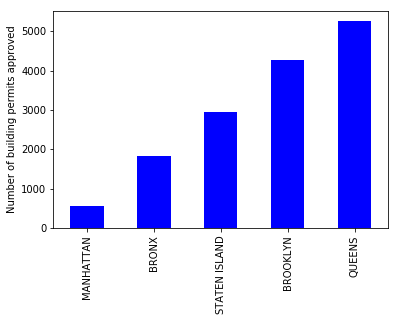

In [389]:
# create a histogram for the # of building permits issued by Borough
ax = data['Borough'].value_counts().sort_values().plot(kind='bar', color = 'b')
ax.set_ylabel('Number of building permits approved')
ax.set_xlabel('')
pd.DataFrame(data['Borough'].value_counts().describe())

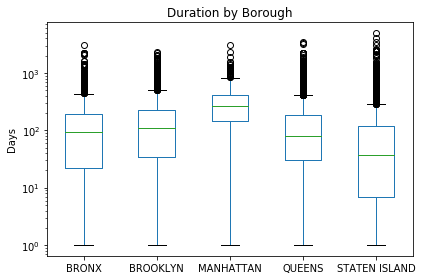

In [390]:
# Create a boxplot of Building Type Duration.
ax = data.boxplot(column=['Duration'], by=['Borough'])
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.grid(False)
ax.set_title('Duration by Borough')
ax.set_yscale('log')
plt.tight_layout()

,Building Type
count,2.000000
mean,7444.500000
std,4620.942815
min,4177.000000
25%,5810.750000
50%,7444.500000
75%,9078.250000
max,10712.000000


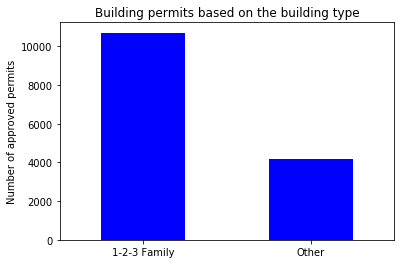

In [391]:
# Create a bar plot of Building Type and include a statistical analysis.
ax = data['Building Type'].value_counts().plot(kind='bar', color='b')
ax.set_xticklabels(['1-2-3 Family', 'Other'],rotation=360)
ax.set_title('Building permits based on the building type')
ax.set_ylabel('Number of approved permits')
pd.DataFrame(data['Building Type'].value_counts().describe())

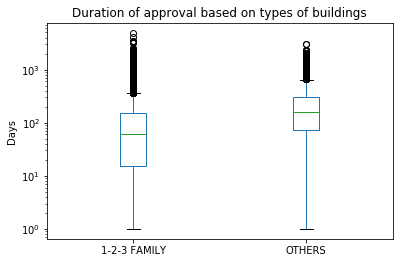

In [392]:
# Create a boxplot of Building Type Duration.
ax = data.boxplot(column=['Duration'], by=['Building Type'])
ax.set_title('Duration of approval based on types of buildings')
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.set_yscale('log')
plt.suptitle('')
ax.grid(False)


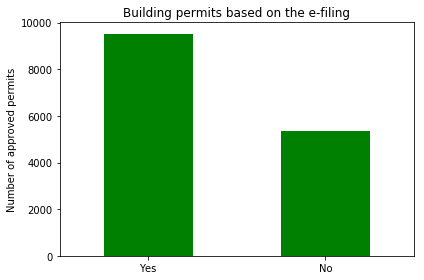

In [393]:
# Create a histogram of Efiling and include a statistical analysis.
ax = data['Efiling Filed'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['Yes','No'],rotation=360)
ax.set_title('Building permits based on the e-filing')
ax.set_ylabel('Number of approved permits')
pd.DataFrame(data['Efiling Filed'].value_counts().describe())
plt.tight_layout()

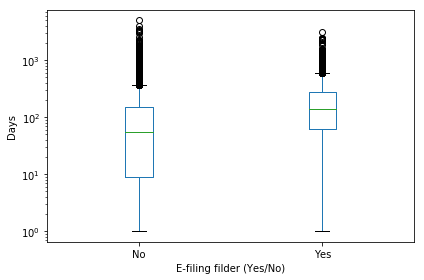

In [394]:
ax = data.boxplot(column=['Duration'], by=['Efiling Filed'])
ax.set_title('')
ax.set_ylabel('Days')
ax.set_xlabel('E-filing filder (Yes/No)')
ax.set_xticklabels(['No','Yes'])
ax.set_yscale('log')
plt.suptitle('')
ax.grid(False)
pd.DataFrame(data.groupby(['Efiling Filed'])['Duration'].describe())
plt.tight_layout()

,count,mean,std,min,25%,50%,75%,max
Applicant Professional Title,,,,,,,,
PE,3784.0,142.570032,232.515007,1.0,21.0,70.0,175.0,4959.0
RA,11105.0,173.243224,263.177321,1.0,26.0,89.0,205.0,4032.0


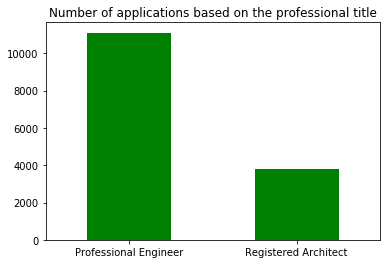

In [395]:
# Create a bar chart of Professional Title and include a statistical analysis.
ax = data['Applicant Professional Title'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['Professional Engineer','Registered Architect'],rotation=360)
ax.set_title('Number of applications based on the professional title')
pd.DataFrame(data.groupby('Applicant Professional Title')['Duration'].describe())

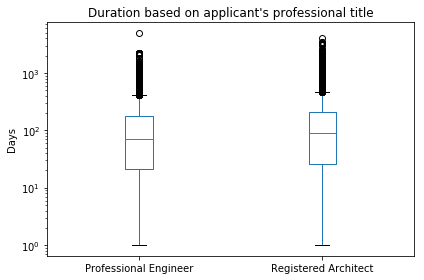

In [396]:
# Boxplot of Duration based on the applicants' professional title.
ax = data.boxplot(column=['Duration'], by=['Applicant Professional Title'])
ax.set_xticklabels(['Professional Engineer','Registered Architect'])
plt.suptitle('')
ax.set_title("Duration based on applicant's professional title")
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.set_yscale('log')

ax.grid(False)
plt.tight_layout()

,count,mean,std,min,25%,50%,75%,max
Professional Cert,,,,,,,,
N,9518.0,223.775373,280.084872,1.0,72.0,140.0,265.0,4959.0
Y,5371.0,62.084714,161.415606,1.0,3.0,13.0,42.0,2589.0


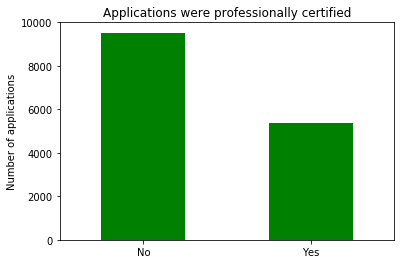

In [397]:
# Bar chart indicating whether or not the application was submitted as 
# Professionally Certified by a Professional Engineer (PE) or Registered Architect (RA).
ax = data['Professional Cert'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['No','Yes'],rotation=360)
ax.set_title('Applications were professionally certified')
ax.set_ylabel('Number of applications')
pd.DataFrame(data.groupby('Professional Cert')['Duration'].describe())


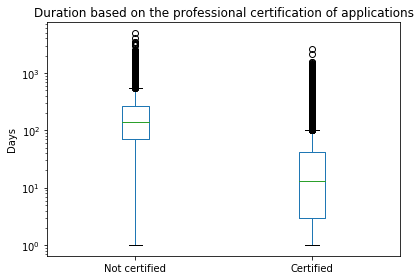

In [398]:
# Boxplot of Duration based on wheather or not the applications were professionally certified.
ax = data.boxplot(column=['Duration'], by=['Professional Cert'])
ax.set_xticklabels(['Not certified','Certified'])
plt.suptitle('')
ax.set_title("Duration based on the professional certification of applications")
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.set_yscale('log')
ax.grid(False)
plt.tight_layout()

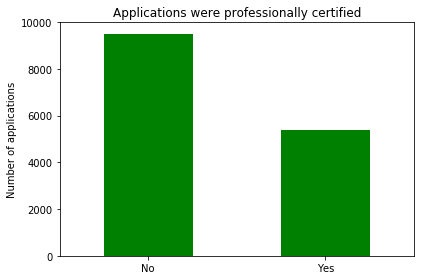

In [399]:
# Bar chart indicating whether or not the application was submitted as 
# Professionally Certified by a Professional Engineer (PE) or Registered Architect (RA).
ax = data['Professional Cert'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['No','Yes'],rotation=360)
ax.set_title('Applications were professionally certified')
ax.set_ylabel('Number of applications')
pd.DataFrame(data.groupby('Professional Cert')['Duration'].describe())
plt.tight_layout()

# DELETE THIS

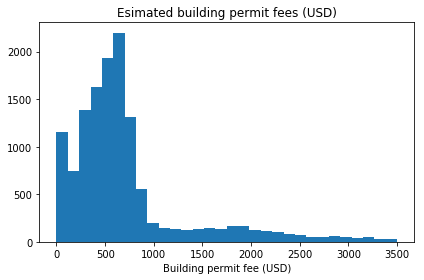

In [400]:
# Histogram of building permit fee () 
ax = data['Total Est. Fee'].hist(bins=30, range=(0,3500))
ax.set_title('Esimated building permit fees (USD)')
ax.set_xlabel('Building permit fee (USD)')
ax.grid(False)
pd.DataFrame((data['Total Est. Fee']).describe()).round(1)
plt.tight_layout()

#### Add a scatter plot building permit fee vs duration and the corr value

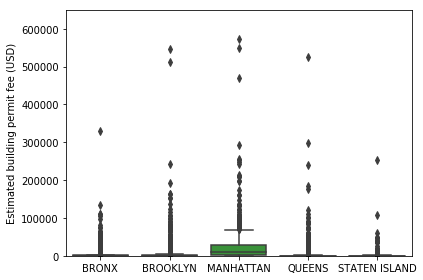

In [401]:
# Boxplot of building permit fee (estimated) in each borough.
ax = sns.boxplot(data=data,x='Borough',y='Total Est. Fee')
ax.set_ylabel('Estimated building permit fee (USD)')
plt.ylim(0,650000)
ax.set_xlabel('')
# ax.set_yscale('log') convert to log 

plt.tight_layout()

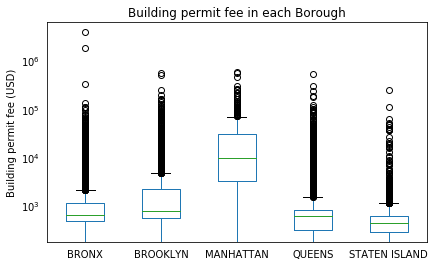

In [402]:
# Boxplot of building permit fee (estimated) in each borough.
ax = data.boxplot(column='Total Est. Fee', by='Borough')
ax.set_yscale('log')
plt.tight_layout()
ax.grid(False)
ax.set_title('Building permit fee in each Borough')
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Building permit fee (USD)')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')


/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


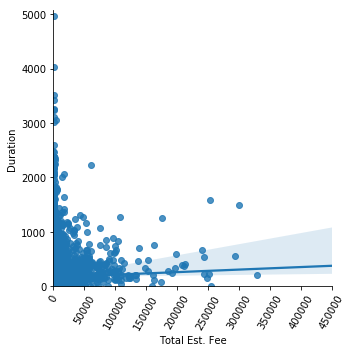

In [403]:
# scatterplot of building permit fee and Duration. 

sns.lmplot(x='Total Est. Fee', y='Duration', data=data)
plt.xlim(0,450000)
plt.ylim(0,5080)
plt.xticks(rotation=60)
plt.tight_layout()

# corr(data['Total Est. Fee'], data['Duration'])

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Proposed zoning area and the approval duration')

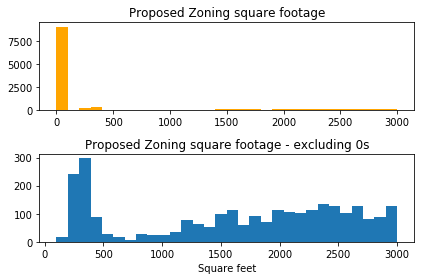

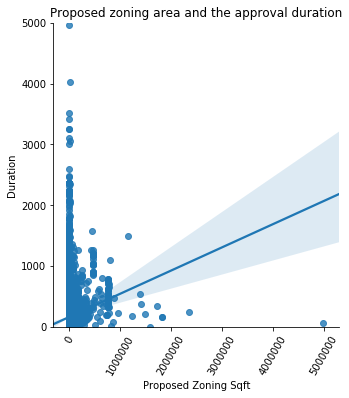

In [404]:
# Histogram of Proposed Zoning square footage. 
fig, ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Proposed Zoning Sqft'].hist(bins=30, range=(0,3000), color='orange')
ax.set_title('Proposed Zoning square footage')
# ax.set_xlabel('Square feet')
ax.grid(False)
pd.DataFrame((data['Proposed Zoning Sqft']).describe()).round(1)

plt.subplot(2,1,2)
ax1 = data['Proposed Zoning Sqft'].hist(bins=30, range=(100,3000))
ax1.set_title('Proposed Zoning square footage - excluding 0s')
ax1.set_xlabel('Square feet')
ax1.grid(False)
plt.tight_layout()

# scatterplot of proposed zoning square feet vs Duration.
sns.lmplot(x='Proposed Zoning Sqft', y='Duration', data=data)
plt.tight_layout()
# plt.xscale('log')
plt.ylim(0,5000)
plt.xticks(rotation=60)
plt.title('Proposed zoning area and the approval duration')

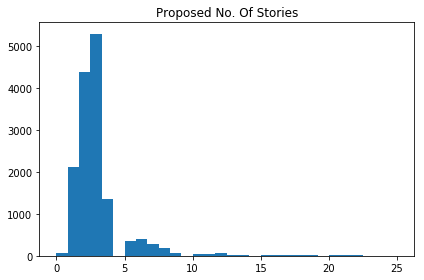

In [405]:
# Histogram of Proposed No. Of Stories. 

# DO A BAR PLOT INSTEAD OF HIST

ax = data['Proposed No. Of Stories'].hist(bins=30, range=(0,25))
ax.set_title('Proposed No. Of Stories')
ax.set_xlabel('')
ax.grid(False)
pd.DataFrame((data['Proposed No. Of Stories']).describe()).round(1)
plt.tight_layout()

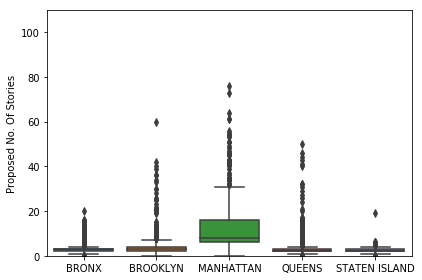

In [406]:
# Boxplot of Proposed No. Of Stories in each borough. 
ax = sns.boxplot(data=data,x='Borough', y='Proposed No. Of Stories')
ax.set(ylim=(0,110))
ax.set_xlabel('')
plt.tight_layout()

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-2.45,0.5,'Duration (days)')

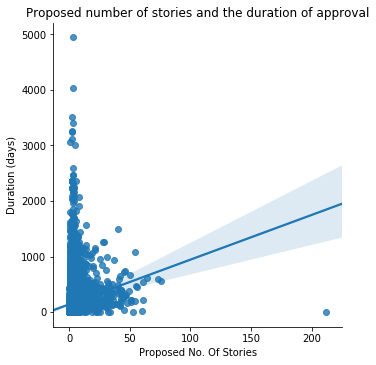

In [407]:
# scatterplot of proposed number of stories and duration.

sns.lmplot(x='Proposed No. Of Stories', y='Duration', data=data)
plt.title('Proposed number of stories and the duration of approval')
plt.ylabel('Duration (days)')

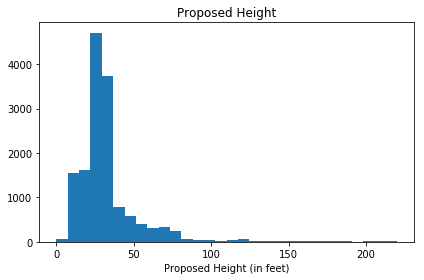

In [408]:
# Histogram of Proposed Height. 
ax = data['Proposed Height'].hist(bins=30, range=(0,220))
ax.set_title('Proposed Height')
ax.set_xlabel('Proposed Height (in feet)')
ax.grid(False)
pd.DataFrame((data['Proposed Height']).describe()).round(1)
plt.tight_layout()

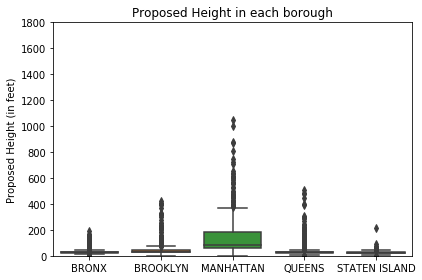

In [409]:
# Boxplot of Proposed Height in each borough. 
ax = sns.boxplot(data=data,x='Borough', y='Proposed Height')
ax.set(ylim=(0,1800))
ax.set_xlabel('')
ax.set_ylabel('Proposed Height (in feet)')
ax.set_title('Proposed Height in each borough')
plt.tight_layout()

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 5100)

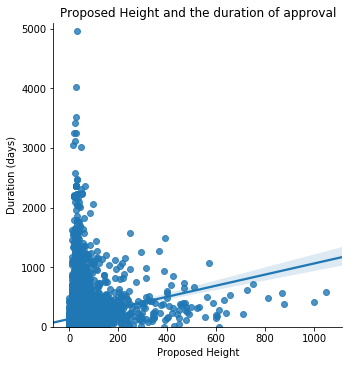

In [410]:
# scatterplot of proposed height and duration.

sns.lmplot(x='Proposed Height', y='Duration', data=data)
plt.title('Proposed Height and the duration of approval')
plt.ylabel('Duration (days)')
plt.ylim(0,5100)

,Proposed Dwelling Units
count,12712.0
mean,9.8
std,43.6
min,0.0
25%,1.0
50%,2.0
75%,3.0
max,1669.0


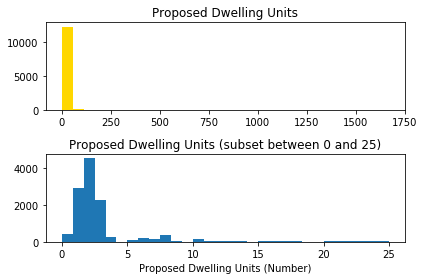

In [411]:
# Histogram of Proposed Height. 
fig,ax = plt.subplots(2,1, sharey=True)
plt.subplot(2,1,1)
ax = data['Proposed Dwelling Units'].hist(bins=30, color='gold')
ax.set_title('Proposed Dwelling Units')
# ax.set_xlabel('Proposed Dwelling Units (Number)')
ax.grid(False)

plt.subplot(2,1,2)
ax1 = data['Proposed Dwelling Units'].hist(bins=30, range=(0,25))
ax1.set_title('Proposed Dwelling Units (subset between 0 and 25)')
ax1.set_xlabel('Proposed Dwelling Units (Number)')
ax1.grid(False)

plt.tight_layout()
pd.DataFrame((data['Proposed Dwelling Units']).describe()).round(1)

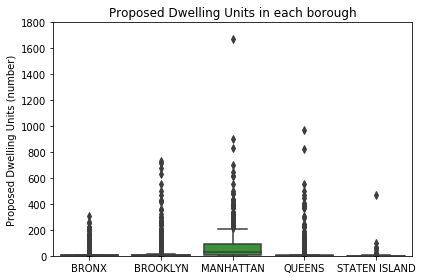

In [412]:
# Boxplot of Proposed Dwelling Units in each borough. 
ax = sns.boxplot(data=data,x='Borough', y='Proposed Dwelling Units')
ax.set(ylim=(0,1800))
ax.set_xlabel('')
ax.set_ylabel('Proposed Dwelling Units (number)')
ax.set_title('Proposed Dwelling Units in each borough')
plt.tight_layout()

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2000)

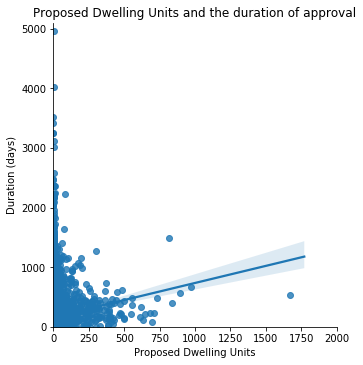

In [413]:
# scatterplot of proposed dwelling units and duration.

sns.lmplot(x='Proposed Dwelling Units', y='Duration', data=data)
plt.title('Proposed Dwelling Units and the duration of approval')
plt.ylabel('Duration (days)')
plt.ylim(0,5100)
plt.xlim(0,2000)

In [414]:
data.head(2)

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,Proposed No. Of Stories,...,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration
12046,QUEENS,OTHERS,Y,RA,N,2015-09-01,2015-12-03,41627.04,103640,7,...,R-2,R6,NaN,NaN,NaN,NaN,N,160104,NaT,93.0
23976,QUEENS,1-2-3 FAMILY,N,RA,N,2005-06-08,2005-08-10,725.87,0,2,...,J-3,R2,NaN,NaN,NaN,NaN,N,3980,2007-04-30,63.0


### Categorical variables that have multiple categories 

#### How to visualize the categorigal variables that have too many categories for a bar chart or box plot?

Zoning, Special Districts and Proposed Occupany variables have multiple categoris each, ranging from 8 (Special District 2) to 43 (Proposed Occupancy) to 164 (Zoning Dist1) and anything in between. 

In [415]:
data['Proposed Occupancy'].unique()

array(['R-2', 'J-3', 'J-2', 'J-0', 'R-3', 'S-2', 'D-2', 'B-2', 'U', 'RES',
       'E', 'M', 'S-1', 'C', 'F-3', 'F-4', 'K', 'J-1', 'F-1B', 'R-1', 'B',
       'H-2', 'G', 'F-2', 'F-1', 'A-3', 'PUB', 'B-1', 'COM', nan, 'D-1',
       'A-2', 'I-2', 'A-4', 'H-1', 'A-5', 'H-5', 'F-1A'], dtype=object)

Text(0,0.5,'Days')

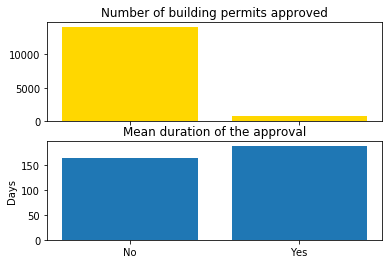

In [416]:
#bar chart of the Non-profit category.

fig, (ax1,ax2) = plt.subplots(2, sharex=True)

ngo=(data.groupby('Non-Profit')[['Approved','Duration']].
agg({'Approved':'count', 'Duration':'mean'}))

ax1.bar(ngo.index, ngo['Approved'], color='gold')
ax1.set_title('Number of building permits approved')
ax2.set_ylabel('Number of applications')

ax2.bar(ngo.index, ngo['Duration'])
ax2.set_title('Mean duration of the approval')
ax2.set_xticklabels(['No','Yes'], rotation=360)
ax2.set_ylabel('Days')

# clarify the title and other a box plot.


,Total_Construction_Floor_Area
count,14889.0
mean,13822.5
std,84258.5
min,0.0
25%,2318.0
50%,3432.0
75%,5339.0
max,7142400.0


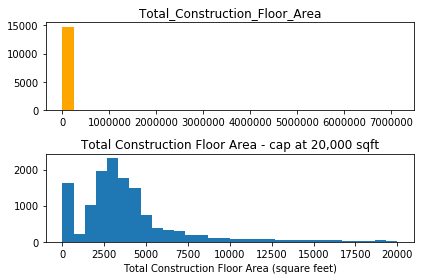

In [417]:
# Histogram of Total Construction Floor Area. 

fig,ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Total_Construction_Floor_Area'].hist(bins=30, color='orange')
ax.set_title('Total_Construction_Floor_Area')
# ax.set_xlabel('Total_Construction_Floor_Area (square feet)')
ax.grid(False)

plt.subplot(2,1,2)
ax1 = data['Total_Construction_Floor_Area'].hist(bins=30,  range=(0,20000))
ax1.set_title('Total Construction Floor Area - cap at 20,000 sqft')
ax1.set_xlabel('Total Construction Floor Area (square feet)')
ax1.grid(False)

plt.tight_layout()
pd.DataFrame((data['Total_Construction_Floor_Area']).describe()).round(1)


/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2000000)

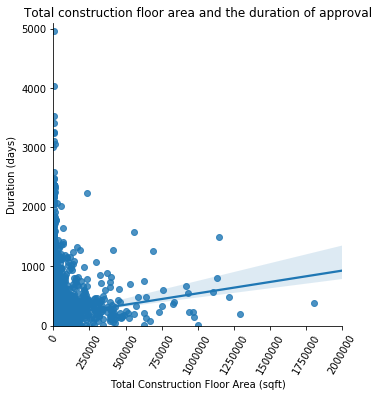

In [418]:
# scatterplot of Total construction floor area and duration.

sns.lmplot(x='Total_Construction_Floor_Area', y='Duration', data=data)
plt.title('Total construction floor area and the duration of approval')
plt.ylabel('Duration (days)')
plt.xlabel('Total Construction Floor Area (sqft)')
plt.ylim(0,5100)
plt.xticks(rotation=60)
plt.xlim(0,2000000)

### Further analysis of the dependent variable and explanatory variables.

Heatmap of all variables and correlations.

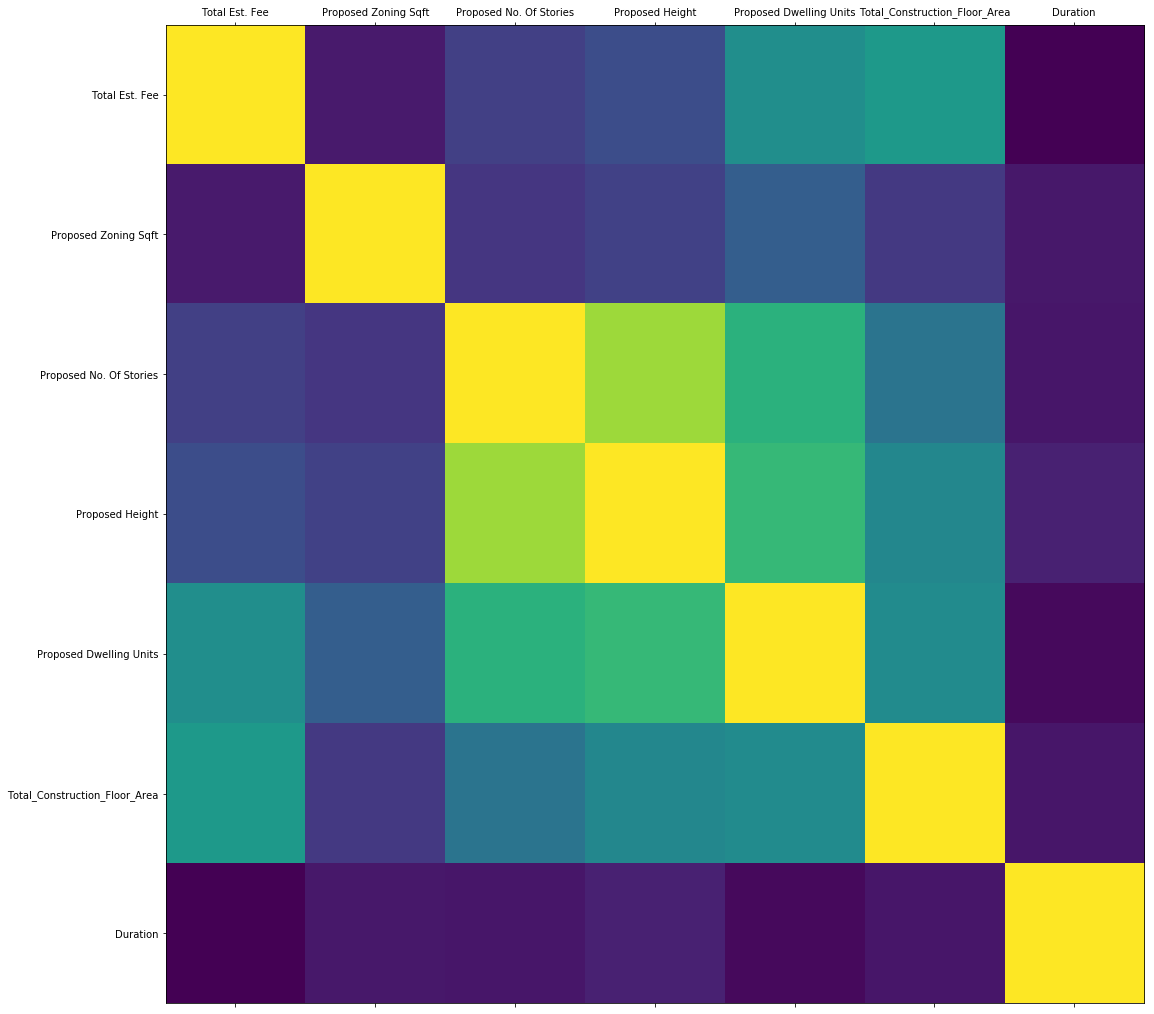

In [419]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the 
    dataframe.

    Input:
        data: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
#     plt.tight_layout()

plot_corr(data, 18)

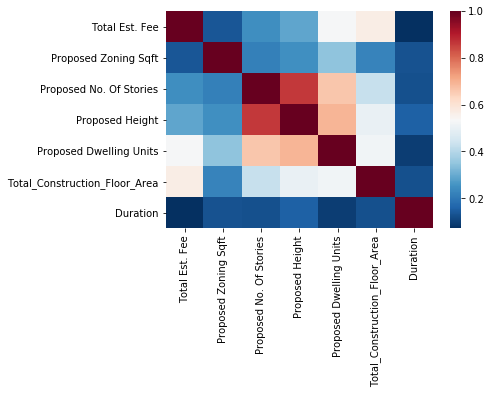

In [420]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdBu_r")

# sns.palplot(sns.diverging_palette(220, 20, n=7))


,Duration
count,14889.000000
mean,165.447713
std,256.074134
min,1.000000
25%,24.000000
50%,84.000000
75%,197.000000
max,4959.000000


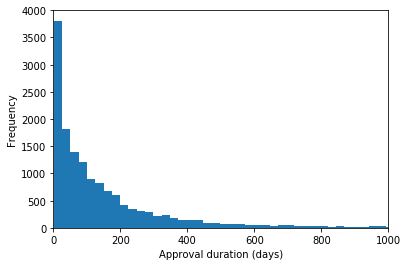

In [421]:
# Create a histogram of duration and include a statistical analysis.
data['Duration'].plot(kind='hist', bins = 200)
plt.xlim(0,1000)
plt.xlabel('Approval duration (days)')
pd.DataFrame(data['Duration'].describe())

Text(0.5,1,'Mean and median duration by borough')

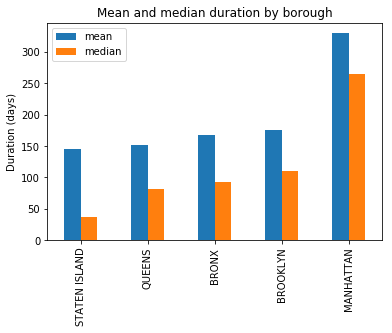

In [422]:
ax = (data.groupby('Borough')['Duration'].agg(['mean','median'])
      .sort_values(by='mean').plot(kind='bar'))
ax.set_xlabel('')
ax.set_ylabel('Duration (days)')
ax.set_title('Mean and median duration by borough')

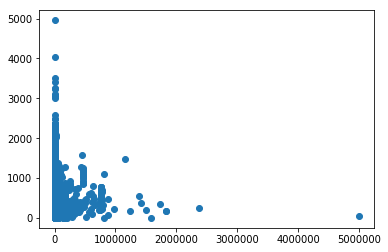

In [423]:
# scatter plot of Proposed Zoning Sqft (x) Duration (y) 
plt.scatter(x=data['Proposed Zoning Sqft'], y=data['Duration'])

### Selecting outliers

Selecting outliers based on the Duration variable. Applying a filter to
select values that are +- 3 standard deviation in this variable. Total number of outliers is
1242 data points, which is 2.1% of the total data.

In [424]:
from scipy.stats import zscore

In [425]:
data['Z_score'] = zscore(data['Duration'])

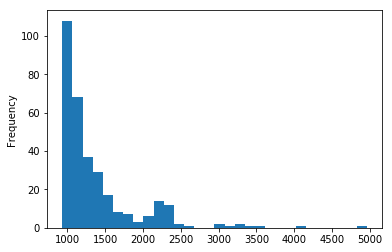

In [426]:
data[data['Z_score'] > 3]['Duration'].plot(kind='hist', bins=30)
# x axis labels add

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14889 entries, 12046 to 105737
Data columns (total 23 columns):
Borough                          14889 non-null category
Building Type                    14889 non-null object
Efiling Filed                    14889 non-null object
Applicant Professional Title     14889 non-null object
Professional Cert                14889 non-null object
Fully Paid                       14889 non-null datetime64[ns]
Approved                         14889 non-null datetime64[ns]
Total Est. Fee                   14889 non-null float64
Proposed Zoning Sqft             14889 non-null int64
Proposed No. Of Stories          14889 non-null int64
Proposed Height                  14889 non-null int64
Proposed Dwelling Units          12712 non-null float64
Proposed Occupancy               14843 non-null object
Zoning Dist1                     14843 non-null object
Zoning Dist2                     1147 non-null object
Zoning Dist3                     50 non-null 

In [428]:
# create a dictionary of dataframes consisting of the data filtered by boroughs. 5 dataframes
# indicating each of the 5 boroughs.

dic = {}
for boro in data['Borough'].unique():
    df = data[data['Borough']==boro]
    dic[boro] = df

In [429]:
# create a dataframe for each borough and save it as borough.csv. Then create a list of names
# of the new created csv files. 
#list containing the names of each borough d
dflist = []
for boro in data['Borough'].unique():
    df = data[data['Borough'] == boro]
    df.to_csv('{}.csv'.format(boro))
    dflist.append('{}.csv'.format(boro))

In [430]:
dflist

['QUEENS.csv',
 'BRONX.csv',
 'STATEN ISLAND.csv',
 'BROOKLYN.csv',
 'MANHATTAN.csv']

In [431]:
brooklyn = pd.read_csv('BROOKLYN.CSV')
brooklyn

,Unnamed: 0,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,117316,BROOKLYN,1-2-3 FAMILY,N,PE,N,2003-07-18,2004-01-21,659.02,0,...,R5,NaN,NaN,NaN,NaN,N,3431,NaN,187.0,0.084167
1,111671,BROOKLYN,OTHERS,Y,PE,N,2017-02-22,2018-01-17,3523.62,8350,...,R6,NaN,NaN,NaN,NaN,N,11624,NaN,329.0,0.638713
2,111239,BROOKLYN,OTHERS,Y,PE,N,2016-07-26,2017-02-02,1587.92,5492,...,R6,NaN,NaN,NaN,NaN,N,5492,NaN,191.0,0.099788
3,117029,BROOKLYN,1-2-3 FAMILY,N,PE,N,2002-12-09,2003-01-07,653.35,0,...,R6,NaN,NaN,NaN,NaN,N,4500,2004-02-26,29.0,-0.532862
4,57566,BROOKLYN,OTHERS,Y,RA,N,2016-07-07,2017-08-16,1858.58,4988,...,R6B,NaN,NaN,NaN,NaN,N,6533,NaN,405.0,0.935512
5,52318,BROOKLYN,OTHERS,N,RA,N,2003-08-14,2004-05-21,6808.90,0,...,C2-4,R6A,R6B,NaN,NaN,N,25926,2008-02-14,281.0,0.451261
6,50962,BROOKLYN,1-2-3 FAMILY,N,RA,N,2002-11-07,2003-02-03,485.80,0,...,R3-2,NaN,NaN,NaN,NaN,N,3111,2004-06-18,88.0,-0.302453
7,112407,BROOKLYN,OTHERS,Y,RA,N,2017-10-28,2018-05-18,1924.00,4997,...,R6B,NaN,NaN,NaN,NaN,N,7400,NaN,202.0,0.142746
8,55285,BROOKLYN,1-2-3 FAMILY,N,PE,N,2005-10-20,2006-03-21,391.41,0,...,R3-2,NaN,NaN,NaN,NaN,N,1130,2015-12-23,152.0,-0.052517
9,109401,BROOKLYN,1-2-3 FAMILY,N,RA,N,2005-08-19,2005-11-04,738.27,0,...,R6,NaN,NaN,NaN,NaN,N,4164,2007-02-13,77.0,-0.345410


In [432]:
%%time
piv = (brooklyn.pivot_table(index='Fully Paid', 
                            columns='Building Type',
                            values=['Duration'],
                            aggfunc='mean'
                           )
      )

CPU times: user 20.9 ms, sys: 3.7 ms, total: 24.6 ms
Wall time: 25.7 ms


CPU times: user 117 ms, sys: 3.95 ms, total: 121 ms
Wall time: 121 ms


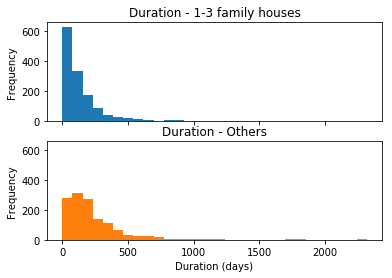

In [433]:
%%time
ax1, ax2 = (piv.plot(kind='hist', bins=30, 
                                       legend=False, subplots=True, sharey=True))
plt.xlabel('Duration (days)')

ax1.set_title('Duration - 1-3 family houses')

ax2.set_title('Duration - Others')

In [434]:
piv2 = (brooklyn.pivot_table(index='Approved', 
                            columns='Building Type',
                            values=['Duration'],
                            aggfunc='mean'
                           )
      )

In [435]:
brooklyn.iloc[:,-10:].head()

,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,R5,NaN,NaN,NaN,NaN,N,3431,NaN,187.0,0.084167
1,R6,NaN,NaN,NaN,NaN,N,11624,NaN,329.0,0.638713
2,R6,NaN,NaN,NaN,NaN,N,5492,NaN,191.0,0.099788
3,R6,NaN,NaN,NaN,NaN,N,4500,2004-02-26,29.0,-0.532862
4,R6B,NaN,NaN,NaN,NaN,N,6533,NaN,405.0,0.935512


In [436]:
# for zon in Brooklyn[['Zoning Dist1', 'Zoning Dist2', 'Zoning Dist3']].columns:
#     print(len(Brooklyn[zon].unique()))

(pd.concat([Brooklyn['Zoning Dist1'], 
            Brooklyn['Zoning Dist2'], Brooklyn['Zoning Dist3']],ignore_index=True)).dropna()

NameError: name 'Brooklyn' is not defined

In [ ]:
brooklyn.head(2)

In [ ]:
pv2 = brooklyn.pivot_table(index='Fully Paid', 
                     columns='Non-Profit', 
                     values=['Duration'],
                    aggfunc='mean'
                    )

In [ ]:
pv2[pv2['Duration']['Y'].notnull()].loc[:,('Duration','Y')].rolling(30).mean().plot()
# plt.ylabel('Days')

In [ ]:
brooklyn['Zoning Dist1'].value_counts(dropna=False)

In [ ]:
brooklyn.head()

In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
(brooklyn[['Total Est. Fee','Proposed Zoning Sqft','Proposed No. Of Stories']].
style.apply(highlight_max))

In [ ]:
melted = (brooklyn[['Zoning Dist1','Zoning Dist2','Zoning Dist3']].
          melt(var_name='Zone', value_name='Code'))

In [ ]:
melted.dropna()

In [ ]:
dic = {}
mel = melted['Code'].value_counts()
for key, item in mel.items():
    dic[key] = item

In [ ]:
from collections import defaultdict
dic1 = defaultdict(int)
for k,v in dic.items():
    if v < 100:
        dic1['other'] += v
    else:
        dic1[k] = v

In [ ]:
plt.bar(*zip(*dic1.items()))

In [ ]:
dic1.items()

In [ ]:
brooklyn.head(2)

In [ ]:
small = brooklyn[['Building Type','Duration','Approved',
           'Total Est. Fee','Total_Construction_Floor_Area']]

small.head()

In [ ]:
brooklyn.head(2)

In [ ]:
data.head(2)

In [ ]:
u = data.set_index(['Borough','Approved']).sort_index()
u

In [ ]:
x = data.groupby(['Borough','Approved']).mean().dropna().sort_index()
x

In [ ]:
xx = x['Duration'].unstack().dropna(axis=1)

In [ ]:
xx

In [ ]:
xx.T.plot()
# plt.xlim(2006,2019)

In [ ]:
data.head(2)

In [ ]:
play = data.groupby(['Borough','Zoning Dist1']).mean()
play

In [ ]:
bytitle = play['Duration'].unstack()

In [ ]:
bytitle = bytitle.dropna(how='all',axis=1)

In [ ]:
bytitle

In [ ]:
bytitle.boxplot()

In [ ]:
((bytitle[('Total Est. Fee','RA')] - bytitle[('Total Est. Fee','PE')]).
 sort_values().plot(kind='bar'))

In [ ]:
bytitle

In [443]:
for i,z in enumerate(x):
    print (i,z)

0 2
1 3
2 4
3 5
4 6
5 6


In [451]:
list(enumerate(x))

TypeError: 'list' object is not callable

In [486]:
! ls

BRONX.csv                  Shmuel_code.docx
BROOKLYN.csv               Untitled.ipynb
MANHATTAN.csv              cleaning.ipynb
NYC_building_permits.ipynb columns_to_use.rtf
PEP8_guidelines.docx       preliminary_analysis.ipynb
QUEENS.csv                 sampling.ipynb
STATEN ISLAND.csv          test.ipynb
